In [1]:
import random

In [2]:
!pip install scipy

In [3]:
!pip install tslearn
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=518196 sha256=791d33e25c4eed1cb1c10a762f38ad790e5a886e02b7913016c4fff47fbc6404
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [4]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [5]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tslearn.metrics import dtw
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans

import inspect
import numpy

Timeseries式のRCMを作る

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
seed = 111
input_path = "/content/drive/My Drive/data.csv"
df = pd.read_csv(input_path, header=0)
df.head(5)

,time,item01,item02,item03,item04,item05,item06,item07,item08,item09,item10,item11,item12
0,1/1/2018,1,2,3,4,5,6,7,8,9,10,11,12
1,2/1/2018,12,13,14,15,16,17,18,19,20,21,22,23
2,3/1/2018,24,25,26,27,28,29,30,31,32,33,34,35
3,4/1/2018,36,37,38,39,40,41,42,43,44,45,46,47
4,5/1/2018,48,49,50,51,52,53,54,55,56,57,58,59


In [10]:
X_train = df.loc[:, df.columns != 'time']

In [11]:
distance, path = fastdtw(X_train[0:1].values, X_train[1:2].values, dist=euclidean)

In [12]:
print(distance)
print(path)

38.1051177665153
[(0, 0)]


DTW距離: 564.0


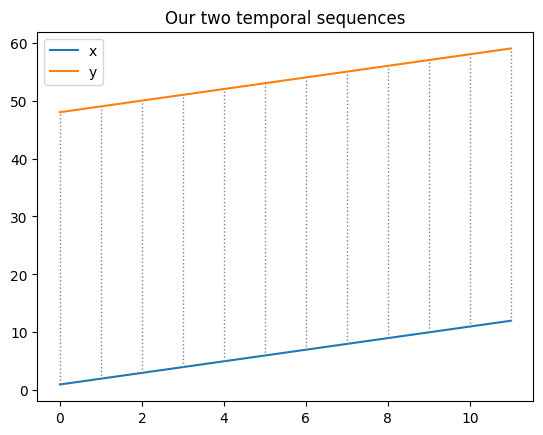

In [13]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from matplotlib import pyplot as plt
# 異なる2種類のデータを定義
x = X_train[0:1].values.reshape(-1, 1)
y = X_train[4:5].values.reshape(-1, 1)
# DTWを計算
distance, path = fastdtw(x, y, dist=euclidean)
print("DTW距離:", distance)
plt.plot(x, label='x')
plt.plot(y, label='y')
# 各点がどのように対応しているかを図示する
for x_, y_ in path:
  plt.plot([x_, y_], [x[x_], y[y_]], color='gray', linestyle='dotted', linewidth=1)
plt.legend()
plt.title('Our two temporal sequences')
plt.show()

DTW距離: 564.0


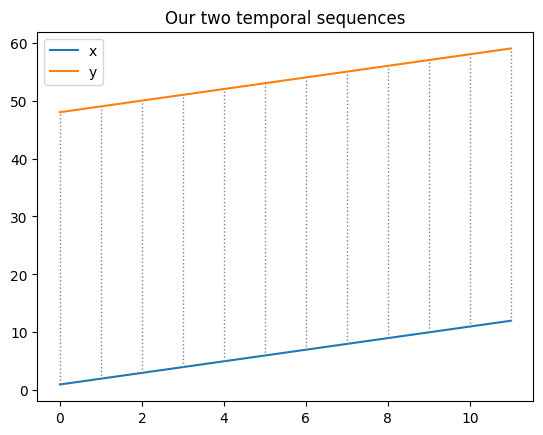

DTW距離: 420.0


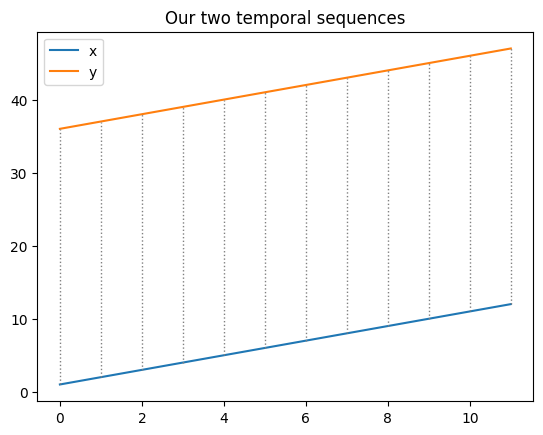

DTW距離: 276.0


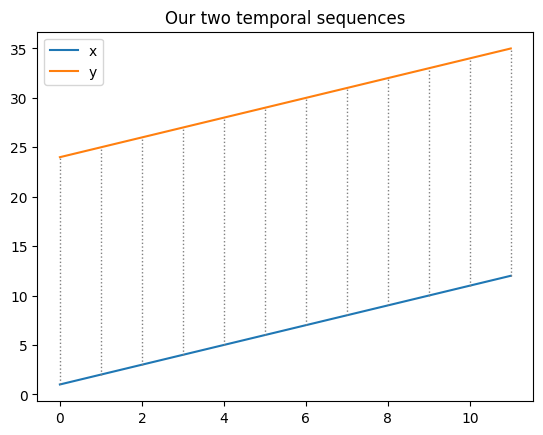

DTW距離: 132.0


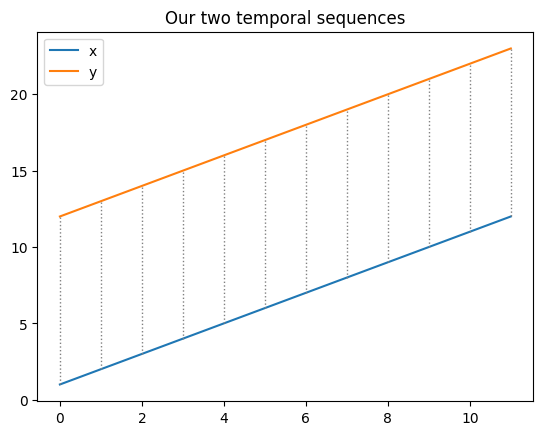

DTW距離: 432.0


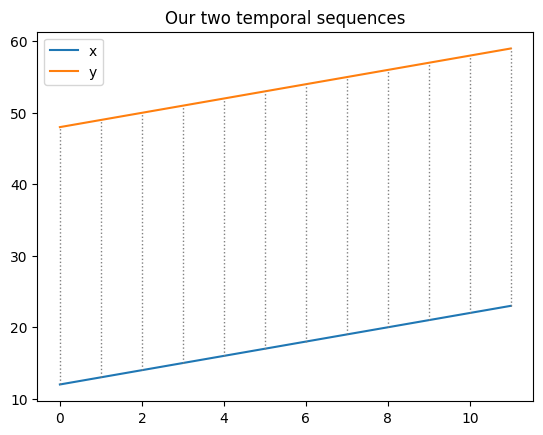

DTW距離: 288.0


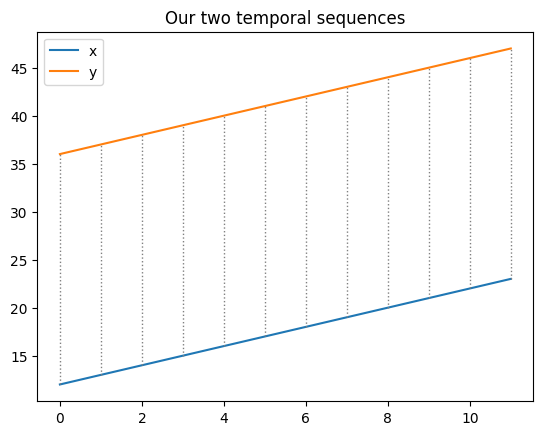

DTW距離: 144.0


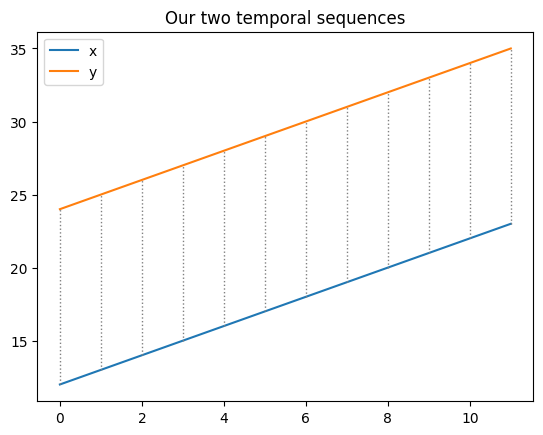

DTW距離: 288.0


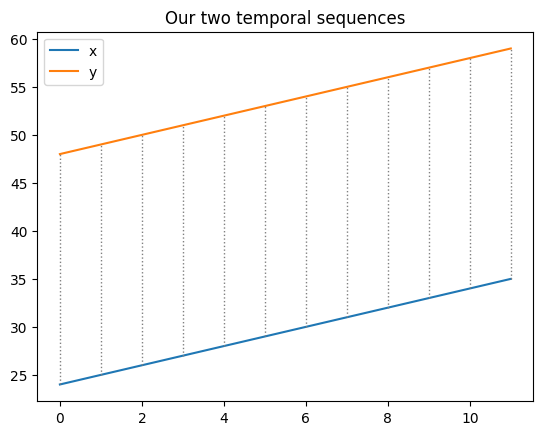

DTW距離: 144.0


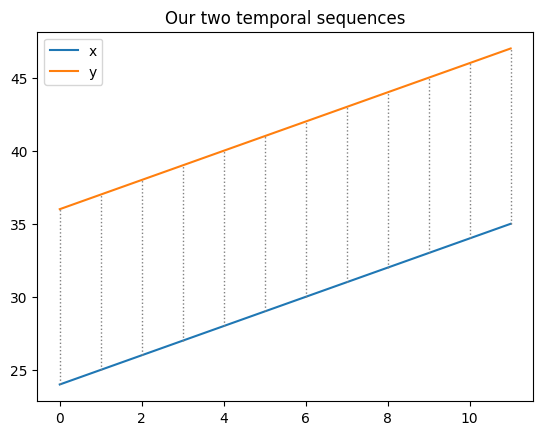

DTW距離: 144.0


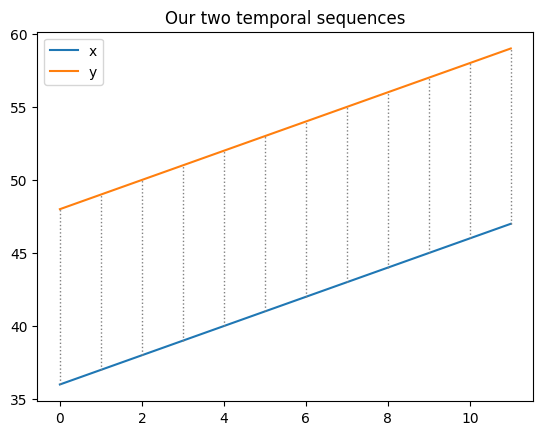

In [14]:
a,b=X_train.values.shape
for i in range(a):
  for j in range(a-i-1):
    x = X_train[i:i+1].values.reshape(-1, 1)
    y = X_train[a-j-1:a-j].values.reshape(-1, 1)
    distance, path = fastdtw(x, y, dist=euclidean)
    print("DTW距離:", distance)
    plt.plot(x, label='x')
    plt.plot(y, label='y')
    # 各点がどのように対応しているかを図示する
    for x_, y_ in path:
      plt.plot([x_, y_], [x[x_], y[y_]], color='gray', linestyle='dotted', linewidth=1)
    plt.legend()
    plt.title('Our two temporal sequences')
    plt.show()

C=3としてデータの中からランダムにクラスタ中心を選ぶ
（kmeans++はあとで）

In [15]:
center=np.arange(a)
np.random.shuffle(center)
C=3
#print(center)
dd=np.empty(a)
for i in range(a):
  x=X_train[center[0]:center[0]+1].values.reshape(-1, 1)
  y=X_train[i:i+1].values.reshape(-1, 1)
  distance, path = fastdtw(x, y, dist=euclidean)
  dd[i]=distance**2
#print(dd)
p=np.empty(a)
for i in range(a):
  p[i]=dd[i]/dd.sum()
#print(p)
CENTER=np.random.choice(np.arange(a),p=p)
#print(p[CENTER])
center=center[center!=CENTER]
center=np.insert(center,1,CENTER)
#print(center)

In [16]:
count=1
for k in range(C-2):
  count+=count
  dd=np.full(a,10000000000)
  for i in range(a):
    for j in range(count):
      x=X_train[center[j]:center[j]+1].values.reshape(-1, 1)
      y=X_train[i:i+1].values.reshape(-1, 1)
      distance, path = fastdtw(x, y, dist=euclidean)
      print(distance)
      if(dd[i]>=distance**2):
        dd[i]=distance**2
  for i in range(a):
    p[i]=dd[i]/dd.sum()
  print(p)
  CENTER=np.random.choice(np.arange(a),p=p)
  print(p[CENTER])
  center=center[center!=CENTER]
  center=np.insert(center,count,CENTER)
print(dd)
print(center)

0.0
420.0
132.0
288.0
276.0
144.0
420.0
0.0
564.0
144.0
[0.         0.29584352 0.35207824 0.         0.35207824]
0.35207823960880197
[    0 17424 20736     0 20736]
[0 3 2 4 1]


In [17]:
print(center)

[0 3 2 4 1]


In [18]:
d=np.empty((C,a))
for i in range(C):
  for j in range(a):
    x = X_train[center[i]:center[i]+1].values.reshape(-1, 1)
    y = X_train[j:j+1].values.reshape(-1, 1)
    distance, path = fastdtw(x, y, dist=euclidean)
    d[i,j]=distance


dimin = d.min(0)
u = (d <= dimin).astype(float)
alpha = 1.5
beta = 0.0
upp = (d <= alpha * dimin + beta).astype(float)

un = upp / upp.sum(0)

b = un @ X_train.values / un.sum(1)[:, np.newaxis]
print(b)

[[ 4.66666667  5.66666667  6.66666667  7.66666667  8.66666667  9.66666667
  10.66666667 11.66666667 12.66666667 13.66666667 14.66666667 15.66666667]
 [42.         43.         44.         45.         46.         47.
  48.         49.         50.         51.         52.         53.        ]
 [20.         21.         22.         23.         24.         25.
  26.         27.         28.         29.         30.         31.        ]]


In [19]:
print(upp)

[[1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0.]]


In [20]:
print(a)
print(b)



5
[[ 4.66666667  5.66666667  6.66666667  7.66666667  8.66666667  9.66666667
  10.66666667 11.66666667 12.66666667 13.66666667 14.66666667 15.66666667]
 [42.         43.         44.         45.         46.         47.
  48.         49.         50.         51.         52.         53.        ]
 [20.         21.         22.         23.         24.         25.
  26.         27.         28.         29.         30.         31.        ]]


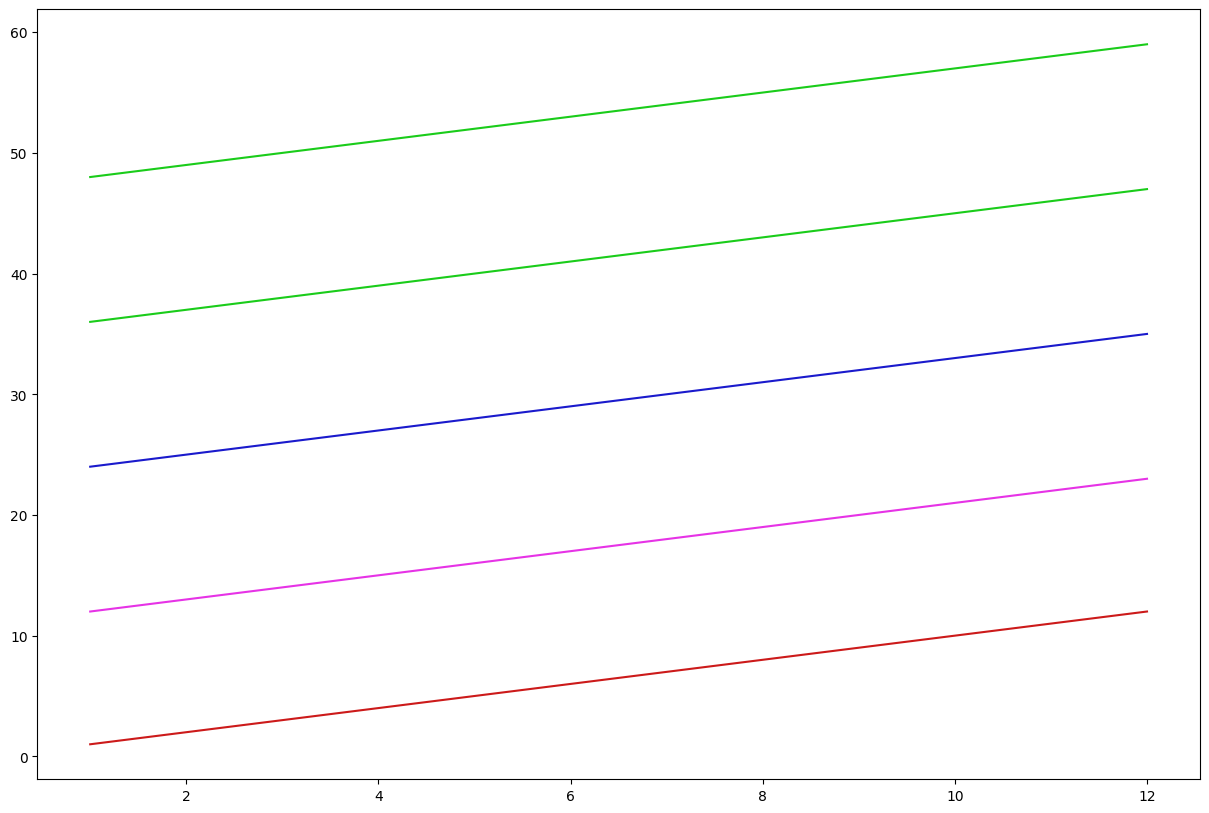

In [21]:
plt.figure(figsize=(15,10))
y=np.array([1,2,3,4,5,6,7,8,9,10,11,12])
for i in range(a):
  XX=X_train[i:i+1].values
  plt.plot(y,np.ravel(XX),color=(upp[0][i]*0.8+upp[1][i]*0.1+upp[2][i]*0.1,upp[1][i]*0.8+upp[0][i]*0.1+upp[2][i]*0.1,upp[2][i]*0.8+upp[1][i]*0.1+upp[0][i]*0.1))


plt.show()